<a href="https://colab.research.google.com/github/moritzWa/dog-breed-identification/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐕   End-to-end dog breed identification problem

## 1. Problem

## 2. Data

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

Evaluation on Multi Class Log Loss.

## 4. Features

- 120 breeds of dogs e.g. classes
- +10k training images with lables
- +10k test set images without lables


## Setup Worspace

In [ ]:
# Import Tensorflow
import tensorflow as tf
import tensorflow_hub as hub

print("TF version", tf.__version__)
print("TF Hub version", hub.__version__)

# Check up GPU availability
print("GPU", "avaliable" if tf.config.list_physical_devices("GPU") else 'none')


TF version 2.4.1
TF Hub version 0.11.0
GPU avaliable


# Preparing data to tensors 


In [ ]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/ML Data/Dog Vision/labels.csv")

labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


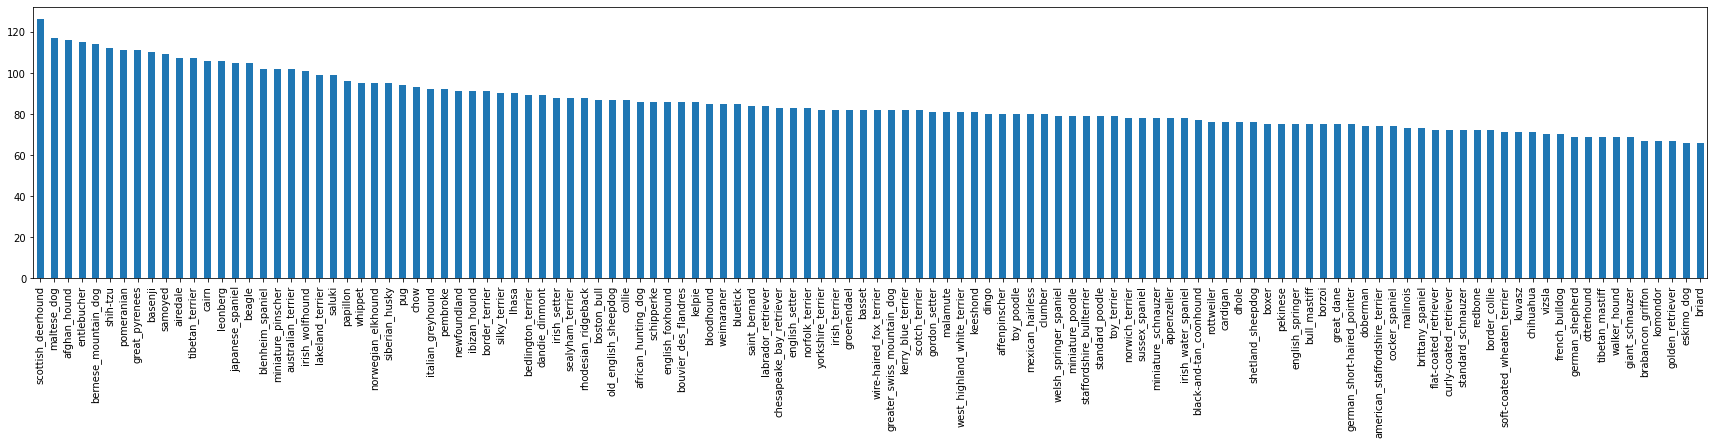

In [ ]:
## check spread of classes (min 10 per class)

labels_csv["breed"].value_counts().plot.bar(figsize=(30,5))

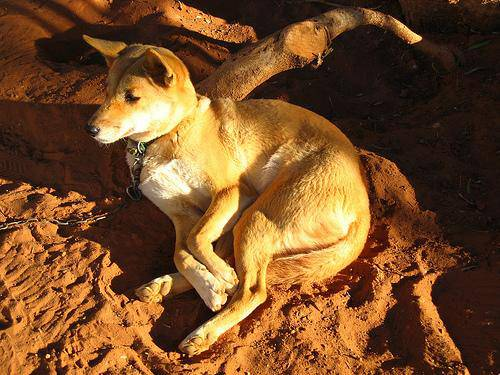

In [ ]:
from IPython.display import Image

Image("drive/MyDrive/ML Data/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
# Create file array from image IDs
filenames = ["drive/MyDrive/ML Data/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['drive/MyDrive/ML Data/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/ML Data/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check for label train data fit 
import os

len(os.listdir("drive/MyDrive/ML Data/Dog Vision/train/")) == len(filenames)

True

In [ ]:
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels) == len(filenames)

True

In [ ]:
# compare unique label values

import numpy as np

unique_breeds = np.unique(labels)
len(unique_breeds)

120

## Feature encoding

In [ ]:
 # Turn single label into array of booleans 
 print(labels[0])
 labels[0] == unique_breeds

 ## (there is one True for the matching class)

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into boolean array
boolean_labels_array = [label == unique_breeds for label in labels]

In [ ]:
len(boolean_labels_array)

10222

In [ ]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels_array[0].argmax()) # index where label occurs in boolean array
print(boolean_labels_array[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
print(labels[2]), print(boolean_labels_array[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


(None, None)

# Splitting data

## Creating validation set

In [ ]:
X = filenames
y = boolean_labels_array

Experimenting with parts of the data

In [ ]:
#Set number of images to experiment with 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max: 10222}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42
)

In [ ]:
X_train[:2], y_train[:2]

(['drive/MyDrive/ML Data/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/ML Data/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

# Feature encoding to Tensors

Function
1. input: image filepath
2. use tensorflow to read file and turn into variable
3. turn jpg image into tensor
4. resize image to be of shape 224,224
5. return: modified image 

In [ ]:
IMG_SIZE = 224

def process_image(image_path):
  
  raw_image = tf.io.read_file(image_path)

  image_rgb_jpg = tf.image.decode_jpeg(raw_image, channels=3)

  # normalize images (slace town to 0-1)
  image_float = tf.image.convert_image_dtype(image_rgb_jpg, tf.float32)

  image_float_resized = tf.image.resize(image_float, size=[IMG_SIZE, IMG_SIZE]) 

  return  image_float_resized

## Batch processing preperation

### Batch Function Input

In [ ]:
def imageToTensorLabelTouple(image_path, label):

  image = process_image(image_path)
  return image, label 

In [ ]:
#demo of input for imageToTensorLabelTouple
(process_image(X[42]), tf.constant(y[42])) 

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## Batch Function 

In [ ]:
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  
  if test_data:
    #no lables only filepaths
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  if valid_data:
    print("crating vilidation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(imageToTensorLabelTouple).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    
    data_shuffled = data.shuffle(buffer_size=len(x))

    data_touples = data_shuffled.map(imageToTensorLabelTouple)

    data_batch = data_touples.batch(BATCH_SIZE)

    return data_batch

In [ ]:
train_data_batches = create_data_batches(X_train, y_train)
Val_data_batches = create_data_batches(X_val, y_val, valid_data=True)

creating training data batches...
crating vilidation data batches...


In [ ]:
# check attributes of data batches
train_data_batches.element_spec, Val_data_batches.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [37]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(10,10))

  for i in range(25):

    # 5*5 subplot 
    ax = plt.subplot(5, 5, i+1)

    # display img
    plt.imshow(images[i])

    # add img label as title
    plt.title(unique_breeds[labels[i].argmax()])

    # turn off grid lines
    plt.axis("off")

In [34]:
# unbatch for visualizaiton
train_images, train_labels = next(train_data_batches.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

In [38]:
y_train[5], unique_breeds[y_train[5].argmax()]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]), 'chesapeake_bay_retriever')

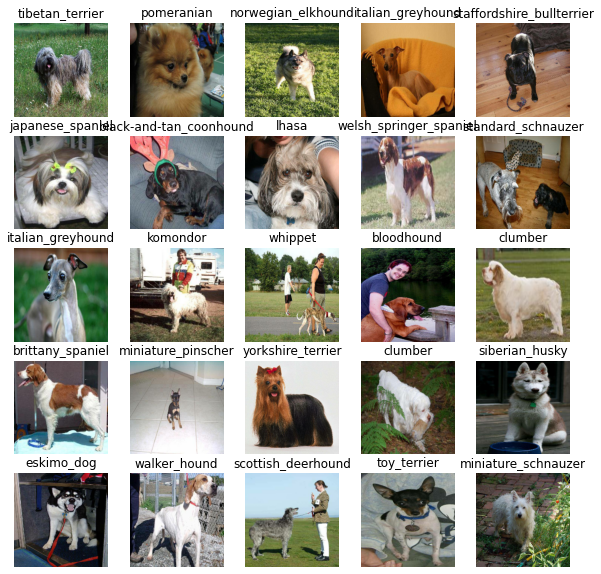

In [39]:
show_25_images(train_images, train_labels)